# Importar librerias

In [1]:
import pandas as pd
import sidetable as stb
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler

# Carga de datos

In [2]:
print("-------------------------------Cargando dataset--------------------------------")
df = pd.read_excel("creditcardmarketing.xlsx", index_col= 0)

-------------------------------Cargando dataset--------------------------------


In [3]:
df.head(3)

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
Customer Number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0


# Análisis exploratorio, EDA

In [4]:
df.columns

Index(['Offer Accepted', 'Reward', 'Mailer Type', 'Income Level',
       '# Bank Accounts Open', 'Overdraft Protection', 'Credit Rating',
       '# Credit Cards Held', '# Homes Owned', 'Household Size',
       'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance',
       'Q3 Balance', 'Q4 Balance'],
      dtype='object')

In [5]:
print("Filas del dataset:", df.shape[0])
print("Columnas del dataset:", df.shape[1])

Filas del dataset: 18000
Columnas del dataset: 16


In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Offer Accepted           object
Reward                   object
Mailer Type              object
Income Level             object
# Bank Accounts Open      int64
Overdraft Protection     object
Credit Rating            object
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home            object
Average Balance         float64
Q1 Balance              float64
Q2 Balance              float64
Q3 Balance              float64
Q4 Balance              float64
dtype: object

In [8]:
df.stb.missing()

,missing,total,percent
Average Balance,24,18000,0.133333
Q1 Balance,24,18000,0.133333
Q2 Balance,24,18000,0.133333
Q3 Balance,24,18000,0.133333
Q4 Balance,24,18000,0.133333
Offer Accepted,0,18000,0.000000
Reward,0,18000,0.000000
Mailer Type,0,18000,0.000000
Income Level,0,18000,0.000000
# Bank Accounts Open,0,18000,0.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
# Bank Accounts Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
# Credit Cards Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
# Homes Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
Average Balance,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
Q1 Balance,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
Q2 Balance,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
Q3 Balance,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Q4 Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


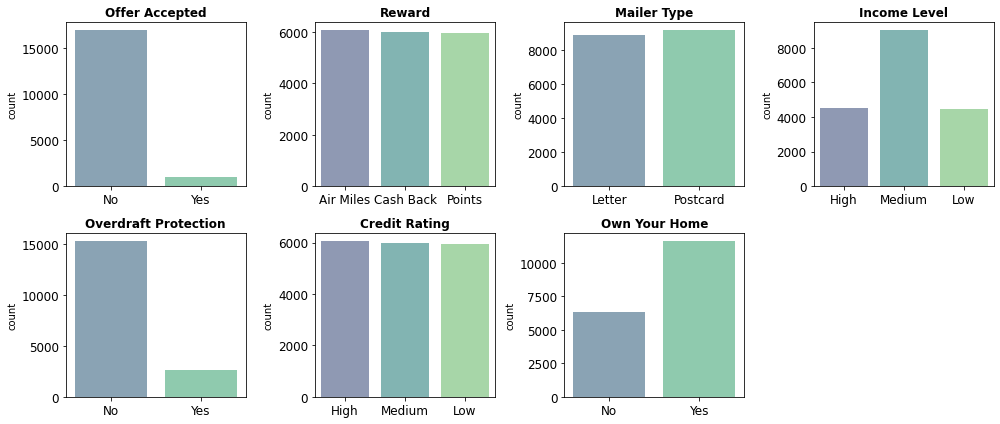

In [10]:
str_cols = df.select_dtypes('object').columns

fig, ax = plt.subplots( 2, 4, figsize=(14, 6))
ax = ax.flat

for i in range(len(str_cols)): 
    sns.countplot(data = df, x = str_cols[i], alpha = 0.6,palette = "viridis", ax = ax[i])
    
    
    ax[i].set_title(str_cols[i], fontsize = 12, fontweight = "bold")
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("")

fig.delaxes(ax[-1])
fig.tight_layout();

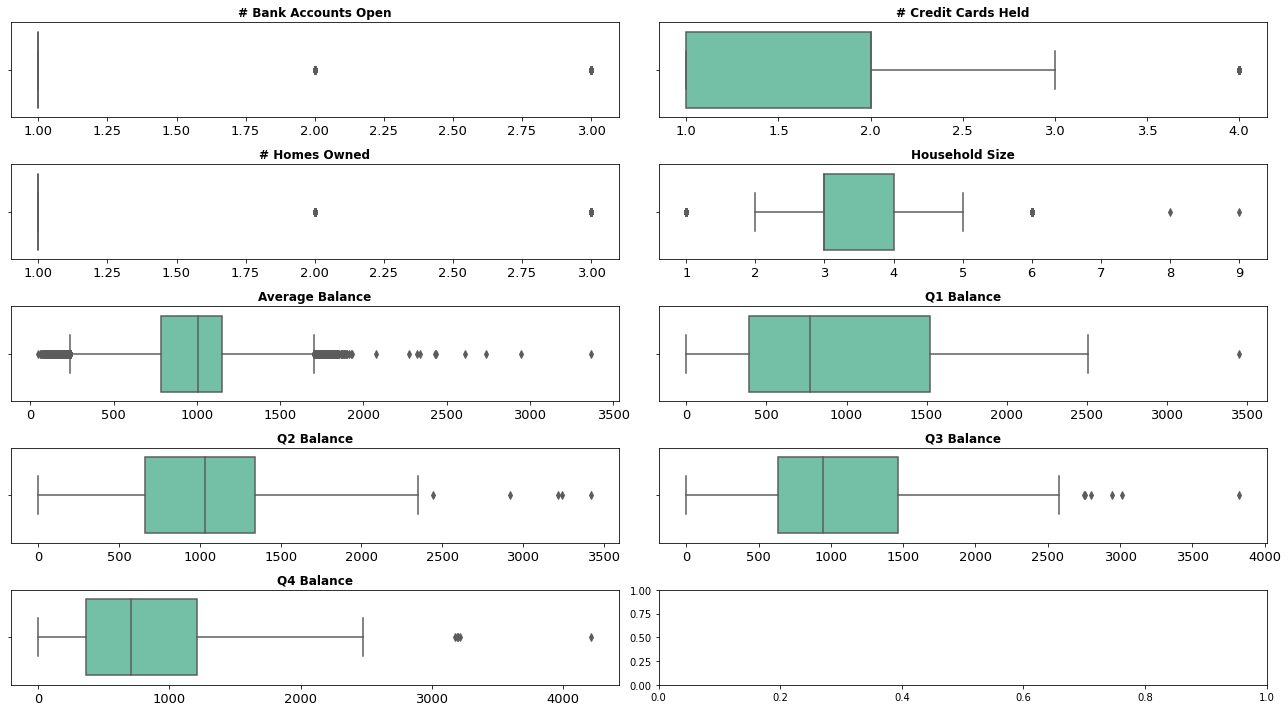

In [11]:
num_cols = df.select_dtypes(np.number).columns

fig, axes = plt.subplots( 5, 2, figsize=(18, 10))
axes = axes.flat

for i in range(len(num_cols)): 
    sns.boxplot(data = df, x = num_cols[i], color= 'mediumaquamarine', ax= axes[i]).set_title(num_cols[i], fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 13)
    axes[i].set_xlabel("")

fig.tight_layout();

# Limpieza preliminar

In [12]:
df.columns = df.columns.str.lower().str.replace("#"," ").str.strip().str.replace(" ","_")
print("Modificamos el nombre de las columnas para que pueda ser más intuitivo su uso durante el proceso de limpieza y modelado")

Modificamos el nombre de las columnas para que pueda ser más intuitivo su uso durante el proceso de limpieza y modelado


In [13]:
values_nans = df[df.isnull().any(axis=1)]
display(values_nans.head(2))
percen_nans = values_nans.shape[0] / df.shape[0] * 100
print(percen_nans)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
Customer Number,,,,,,,,,,,,,,,,
324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN


0.13333333333333333


Todas las filas que contienen valores nulos estan concentradas en las columnas sobre el salario del cliente. Una vez analizadas las 24 filas que contienen nans procedemos a eliminarlas, no llegan ni al 1% del dataset.

# Análisis Preprocesado

### Variable respuesta

No     0.943167
Yes    0.056833
Name: offer_accepted, dtype: float64

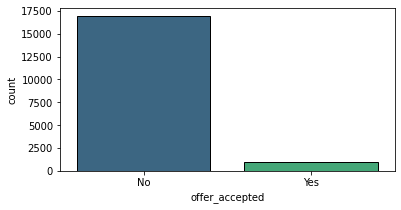

In [14]:
plt.figure(figsize=(6,3))

sns.countplot(data = df, x = "offer_accepted",  palette = "viridis",  edgecolor='black');

df['offer_accepted'].value_counts() / df.shape[0]

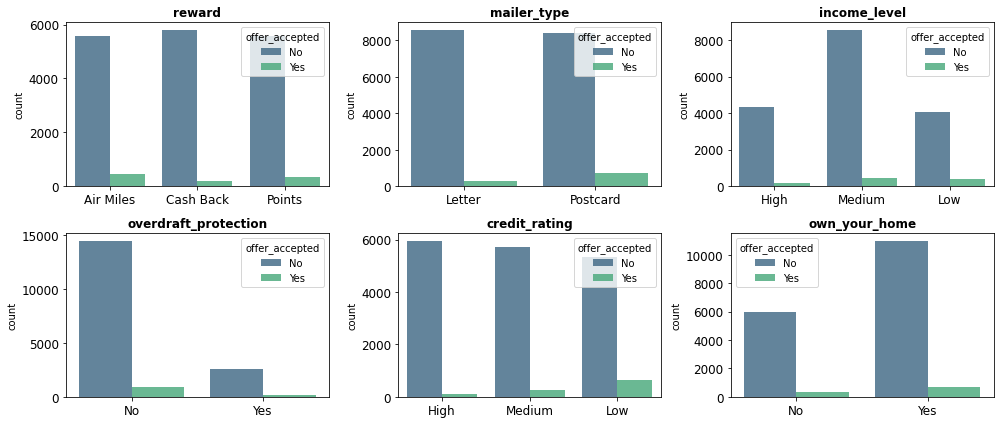

In [15]:
str_cols2 = df.select_dtypes('object').columns.drop("offer_accepted")

fig, ax = plt.subplots( 2, 3, figsize=(14, 6))
ax = ax.flat

for i in range(len(str_cols2)): 
    sns.countplot(data = df, x = str_cols2[i], alpha = 0.8,hue= 'offer_accepted', palette = "viridis",ax = ax[i])
    
    
    ax[i].set_title(str_cols2[i], fontsize = 12, fontweight = "bold")
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("")

fig.tight_layout();

In [16]:
df.stb.freq(['credit_rating', 'offer_accepted'])

,credit_rating,offer_accepted,count,percent,cumulative_count,cumulative_percent
0,High,No,5952,33.066667,5952,33.066667
1,Medium,No,5701,31.672222,11653,64.738889
2,Low,No,5324,29.577778,16977,94.316667
3,Low,Yes,633,3.516667,17610,97.833333
4,Medium,Yes,271,1.505556,17881,99.338889
5,High,Yes,119,0.661111,18000,100.000000


In [17]:
df.stb.freq(['income_level', 'offer_accepted'])

,income_level,offer_accepted,count,percent,cumulative_count,cumulative_percent
0,Medium,No,8543,47.461111,8543,47.461111
1,High,No,4361,24.227778,12904,71.688889
2,Low,No,4073,22.627778,16977,94.316667
3,Medium,Yes,470,2.611111,17447,96.927778
4,Low,Yes,388,2.155556,17835,99.083333
5,High,Yes,165,0.916667,18000,100.000000


In [18]:
df.stb.freq(['mailer_type', 'offer_accepted'])

,mailer_type,offer_accepted,count,percent,cumulative_count,cumulative_percent
0,Letter,No,8553,47.516667,8553,47.516667
1,Postcard,No,8424,46.800000,16977,94.316667
2,Postcard,Yes,723,4.016667,17700,98.333333
3,Letter,Yes,300,1.666667,18000,100.000000


**Resumen**

Las principales conclusiones del análisis de variables categóricas son:

- Los clientes que aceptan la tarjeta de credito tienen una clasificación creditiva baja.
- Prefieren recibirla via postal.
- En la mayoria de los casos, el nivel de ingresos de los clientes que aceptan la tarjeta de credito tienen un nivel de ingresos medio-bajo.

### Variables numéricas

In [19]:
df_yes = df[df['offer_accepted'] == 'Yes']
df_no = df[df['offer_accepted'] == 'No']
print("---  Resumen estadístico sobre los clientes que si aceptaron la oferta  ---")
display(df_yes.describe().T)
print("---  Resumen estadístico sobre los clientes que NO aceptaron la oferta  ---")
display(df_no.describe().T)

---  Resumen estadístico sobre los clientes que si aceptaron la oferta  ---


,count,mean,std,min,25%,50%,75%,max
bank_accounts_open,1023.0,1.254154,0.463881,1.00,1.0,1.0,1.0,3.00
credit_cards_held,1023.0,1.896383,0.806661,1.00,1.0,2.0,2.0,4.00
homes_owned,1023.0,1.202346,0.423288,1.00,1.0,1.0,1.0,3.00
household_size,1023.0,3.440860,1.125306,1.00,3.0,3.0,4.0,9.00
average_balance,1021.0,934.980167,348.586313,75.75,800.5,1008.5,1151.0,1879.25
q1_balance,1021.0,868.670911,621.091927,2.00,359.0,721.0,1479.0,2189.00
q2_balance,1021.0,998.813908,463.188441,8.00,652.0,1051.0,1347.0,1995.00
q3_balance,1021.0,1060.929481,567.424601,11.00,630.0,964.0,1527.0,2292.00
q4_balance,1021.0,811.506366,548.032407,4.00,389.0,703.0,1198.0,2197.00


---  Resumen estadístico sobre los clientes que NO aceptaron la oferta  ---


,count,mean,std,min,25%,50%,75%,max
bank_accounts_open,16977.0,1.255876,0.473028,1.00,1.0,1.0,1.000,3.00
credit_cards_held,16977.0,1.903929,0.796445,1.00,1.0,2.0,2.000,4.00
homes_owned,16977.0,1.203511,0.427596,1.00,1.0,1.0,1.000,3.00
household_size,16977.0,3.502562,1.113444,1.00,3.0,3.0,4.000,8.00
average_balance,16955.0,940.848894,350.408076,48.25,787.0,1007.0,1153.375,3366.25
q1_balance,16955.0,912.966559,619.944358,0.00,396.0,774.0,1525.000,3450.00
q2_balance,16955.0,999.427013,457.065296,0.00,664.0,1031.0,1342.000,3421.00
q3_balance,16955.0,1040.895724,552.596459,0.00,633.0,945.0,1458.000,3823.00
q4_balance,16955.0,810.106281,559.670799,0.00,362.0,703.0,1213.000,4215.00


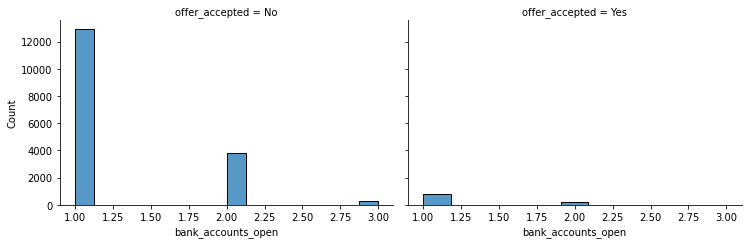

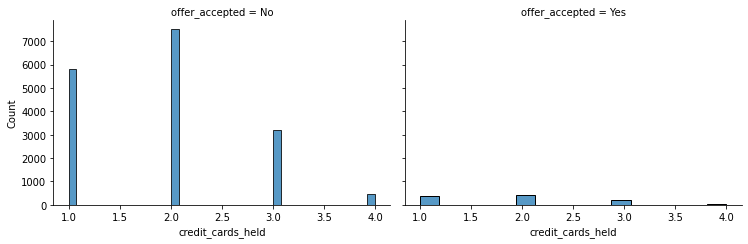

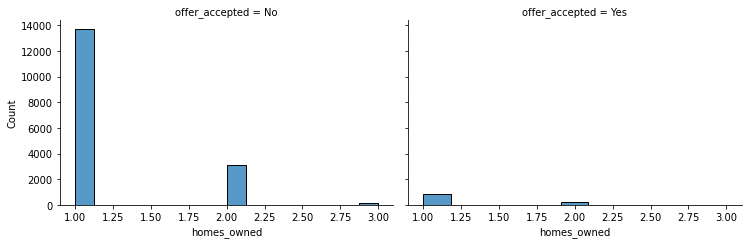

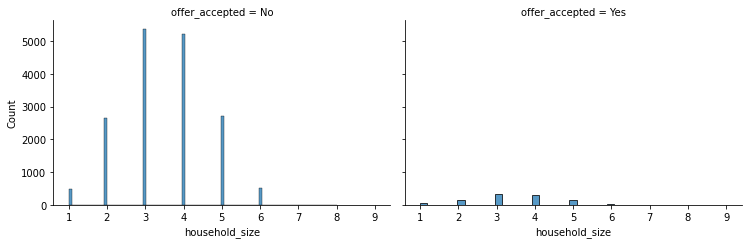

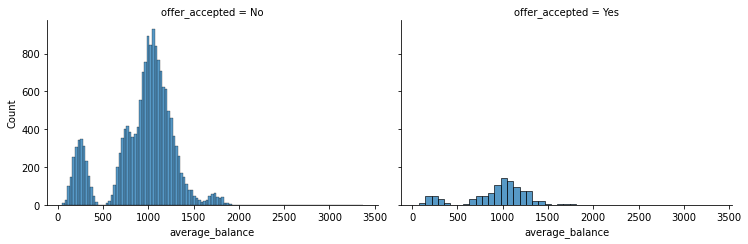

In [20]:
num_cols = df.select_dtypes(np.number).columns.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'])


for i in range(len(num_cols)):
    graf = sns.FacetGrid(df, col="offer_accepted", height=3.5, aspect=1.5)
    graf.map(sns.histplot, num_cols[i]);

Antes de realizar la codificación de las variables categóricas, revisamos la relación entre las variables numéricas.

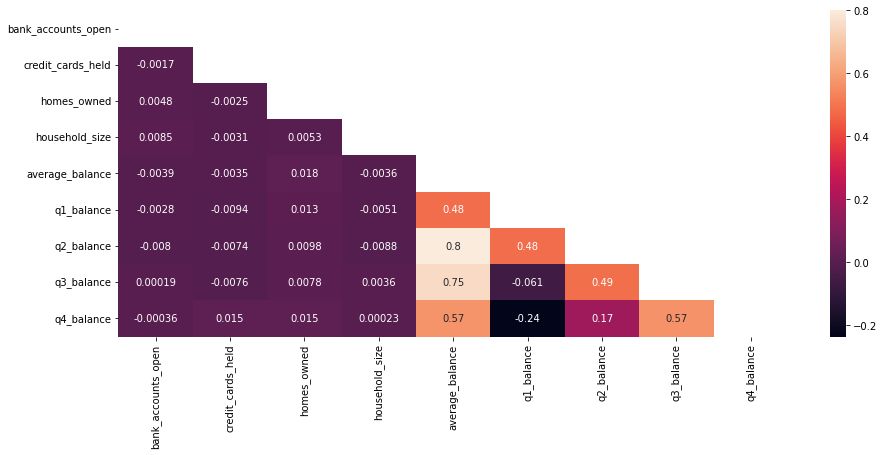

In [21]:
plt.figure(figsize=(15,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot = True, mask = mask); #barra lateral

In [22]:
df.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'], axis=1, inplace= True)

**Resumen del análisis de las variables numéricas**

Estas son las principales conclusiones extraídas:

- La distribución de las variables continuas guardan relación entre los clientes que aceptaron y los que no, la tarjeta de crédito.
- El 75% de los clientes disponen una única cuenta abierta y una casa en propiedad. Dado que es un número muy elevado de casos, hacer una oferta especial a este tipo de cliente posiblemente aumentaría las adquisiciones de tarjetas de crédito.
- En la mayoría de los casos, tanto si aceptaron o no la oferta, los clientes no disponen de un sueldo superior a 1153$.

# Preprocesamiento

## Outliers

In [23]:
df = df[df['average_balance'] <= np.nanpercentile(df['average_balance'], 75)]
df = df[df['household_size'] <= np.nanpercentile(df['household_size'], 75)]
df['offer_accepted'].value_counts()[1] / df['offer_accepted'].value_counts()[0] * 100     # % de personas que aceptaron la oferta

6.173078786704138

Desestimamos a los clientes que tienen un saldo en la cuenta superior al Q3, debido a que aun desestimándolos mantenemos la proporción entre clientes que aceptaron o no la oferta. Lo mismo ocurre con el numero de personas que hay en la familia.

# Estandarización

In [24]:
num_col = df.select_dtypes(include=np.number).columns

scaler = StandardScaler()
scaler.fit(df[num_col])
X_escaladas = scaler.transform(df[num_col])
df[num_col] = X_escaladas
df.head(10)

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance
Customer Number,,,,,,,,,,,,
3,No,Air Miles,Postcard,High,1.58558,No,Medium,0.123321,-0.465955,-1.328969,Yes,-1.790385
6,No,Air Miles,Letter,Medium,-0.54643,No,High,1.382507,-0.465955,1.061670,No,0.988301
7,No,Air Miles,Letter,Medium,-0.54643,No,Medium,0.123321,-0.465955,-0.133650,No,-1.766353
8,No,Cash Back,Postcard,Low,-0.54643,No,Medium,2.641692,-0.465955,1.061670,Yes,-1.783756
9,No,Air Miles,Postcard,Medium,-0.54643,No,Low,0.123321,-0.465955,1.061670,Yes,0.624495
10,No,Air Miles,Letter,High,1.58558,No,Low,1.382507,1.909571,1.061670,Yes,0.522562
11,No,Air Miles,Postcard,Medium,-0.54643,No,Medium,1.382507,-0.465955,-1.328969,Yes,1.056256
13,No,Points,Letter,Medium,-0.54643,No,Low,-1.135864,-0.465955,-1.328969,Yes,1.106808
14,No,Points,Letter,Low,-0.54643,No,High,-1.135864,-0.465955,-0.133650,No,0.781122


# Codificación  

In [25]:
df['offer_accepted'] = df['offer_accepted'].replace('Yes', 1).replace('No', 0)

def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    return df

orden_mailer = ['Letter', 'Postcard']
orden_income = ['Low', 'High', 'Medium']
orden_protection = ['Yes', 'No']
orden_home = ['No', 'Yes']

df = ordinal_encoder(orden_mailer, df, "mailer_type")
df = ordinal_encoder(orden_income, df, "income_level")
df = ordinal_encoder(orden_protection, df, "overdraft_protection")
df = ordinal_encoder(orden_home, df, "own_your_home")

names_col = ['reward', 'credit_rating']

for col in names_col:
    dummies = pd.get_dummies(df[col], prefix_sep = "_", prefix = col, dtype = int)
    df = pd.concat([dummies, df], axis = 1)
    
df.drop(names_col, axis = 1, inplace = True)

# Ajuste de modelo 

In [26]:
# dividimos el dataset en variables predictoras y respuesta
X = df.drop('offer_accepted', axis = 1) # variables predictoras
y = df["offer_accepted"] # variable respuesta 

In [27]:
# iniciamos el método
down = RandomUnderSampler()

# ajustamos el modelo
X_down, y_down = down.fit_resample(X,y)

y_down.value_counts()

0    637
1    637
Name: offer_accepted, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size = 0.2, random_state = 25)

In [29]:
y_train.describe()

count    1019.000000
mean        0.501472
std         0.500243
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: offer_accepted, dtype: float64

In [30]:
y_test.describe()

count    255.000000
mean       0.494118
std        0.500949
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: offer_accepted, dtype: float64

## Logistic Regression

In [31]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [32]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [33]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
    mat_lr = confusion_matrix(clases_reales, clases_predichas)

    df = pd.DataFrame(mat_lr)
    df = ((df / total_filas_test) * 100).round(2)
    return df

matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

,0,1
0,33.73,16.86
1,15.69,33.73


## Decision Tree Classifier

In [34]:
confusion_matrix(y_test, y_pred_lr_test)

array([[86, 43],
       [40, 86]], dtype=int64)